# **Machine Learning para Detecção de Câncer**

## **1. Introdução**

<p align="justify">
A detecção precoce do câncer é crucial para aumentar as taxas de sobrevivência e melhorar a qualidade de vida dos pacientes. Com o avanço das tecnologias de machine learning, há uma oportunidade significativa para desenvolver modelos que possam auxiliar na identificação de padrões e na previsão de diagnósticos com base em dados clínicos. Este projeto tem como objetivo utilizar o PyCaret, uma biblioteca de machine learning de baixo código em Python, para explorar o conjunto de dados "Cancer_data.csv". Através de uma análise abrangente e da comparação de diferentes modelos, buscamos encontrar a solução ideal que maximize a precisão das previsões, contribuindo para o diagnóstico precoce e a melhor tomada de decisões na área da saúde.

In [1]:
# Instalando biblioteca

# !pip install pycaret

In [2]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
sns.set()

In [4]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Portfólio/Dados/Cancer_data.csv')

**Fonte:** https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset/data

**Features**

* **Age:** Integer values representing the patient's age, ranging from 20 to 80.

* **Gender:** Binary values representing gender, where 0 indicates Male and 1 indicates Female.

* **BMI:** Continuous values representing Body Mass Index, ranging from 15 to 40.

* **Smoking:** Binary values indicating smoking status, where 0 means No and 1 means Yes.

* **GeneticRisk:** Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

* **PhysicalActivity:** Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

* **AlcoholIntake:** Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

* **CancerHistory:** Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

* **Diagnosis:** Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

**Target Variable**

* **Diagnosis:** The main variable to predict, indicating if a patient has cancer.

In [5]:
# Visualizando dados

dados.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


## **2. Análise Exploratória de Dados**

In [6]:
# Informações sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


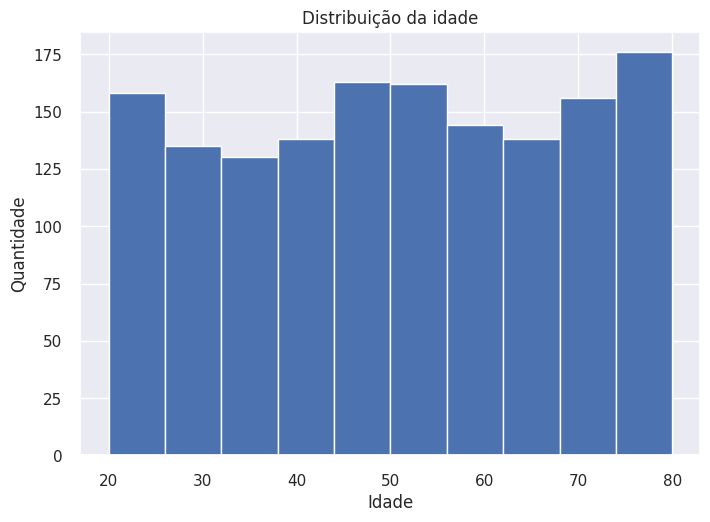

In [7]:
# Gráfico 1: Analisando a distribuição da idade

dados['Age'].hist()

plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

plt.show();

**Observação 1**

<p align="justify">
O histograma da variável Age  mostra a distribuição da idade dos pacientes, que varia de 20 a 80 anos, com uma representação relativamente uniforme entre 25 e 75 anos e leves picos próximos aos 30, 50 e 70 anos, onde a quantidade atinge cerca de 150-175 por intervalo, sem pacientes muito jovens (<20) ou muito idosos (>80), indicando a ausência de outliers extremos e sugerindo que todas as faixas etárias estão bem representadas no dataset.

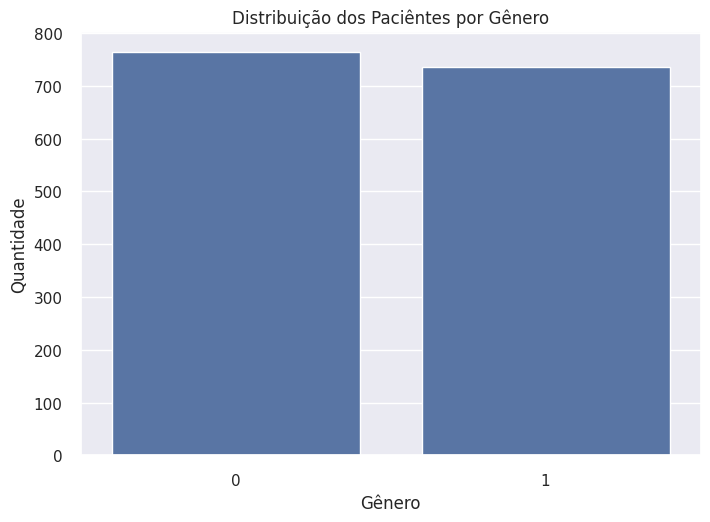

In [8]:
# Gráfico 2: Distribuição dos dados por Gênero

## 0 -> Masculino
## 1 -> Feminino

sns.countplot(x = 'Gender', data = dados)

plt.title('Distribuição dos Paciêntes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.show();

**Observação 2**

<p align="justify">
O gráfico de barras da variável Gender mostra a distribuição dos pacientes por gênero, com a categoria 0 (masculino) contendo cerca de 750 pacientes e a categoria 1 (feminino) contendo aproximadamente 700 pacientes, indicando uma distribuição quase equilibrada entre os gêneros no dataset, com uma leve predominância de pacientes masculinos.

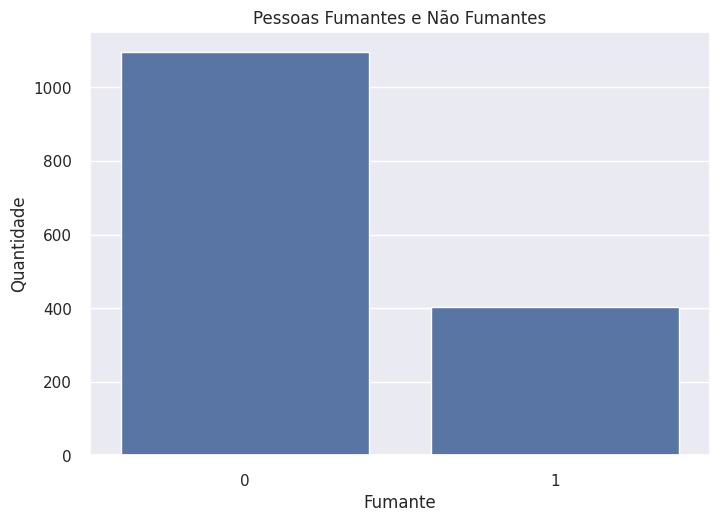

In [9]:
# Gráfico 3: Pessoas fumantes e não fumantes

## 0 -> No
## 1 -> Yes

sns.countplot(x = 'Smoking', data = dados)

plt.title('Pessoas Fumantes e Não Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Quantidade')

plt.show();

**Observação 3**

<p align="justify">
O gráfico de barras da variável Smoking mostra a distribuição dos pacientes entre fumantes e não fumantes, com a categoria 0 (não fumantes) contendo cerca de 1000 pacientes e a categoria 1 (fumantes) contendo aproximadamente 400 pacientes, indicando uma predominância significativa de não fumantes no dataset, com quase 2,5 vezes mais pacientes não fumantes do que fumantes.

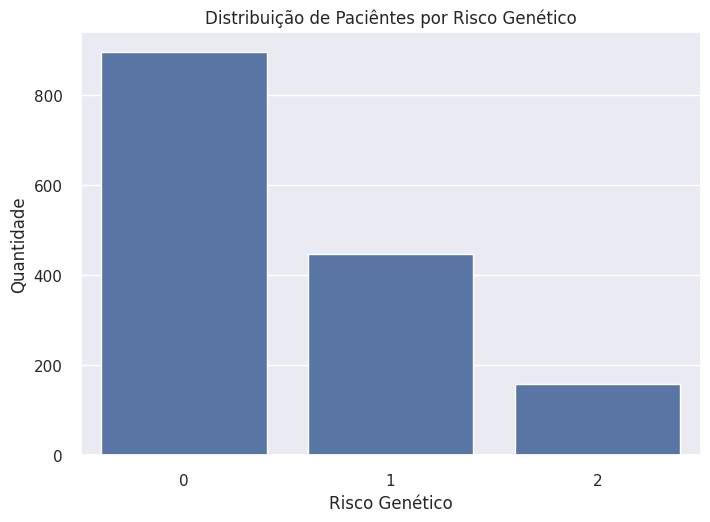

In [10]:
# Gráfico 4: Distribuição dos dados por Risco Genético com legenda

## 0 -> Low Risk
## 1 -> Medium Risk
## 2 -> High Risk

sns.countplot(x = 'GeneticRisk', data = dados)

plt.title('Distribuição de Paciêntes por Risco Genético')
plt.xlabel('Risco Genético')
plt.ylabel('Quantidade')

plt.show();

**Observação 4**

<p align="justify">
O gráfico de barras da variável GeneticRisk mostra a distribuição dos pacientes por nível de risco genético, com a categoria 0 (baixo risco) contendo cerca de 900 pacientes, a categoria 1 (médio risco) com aproximadamente 400 pacientes e a categoria 2 (alto risco) com cerca de 200 pacientes, indicando uma predominância de pacientes com baixo risco genético, seguida por médio risco, e uma minoria com alto risco no dataset.

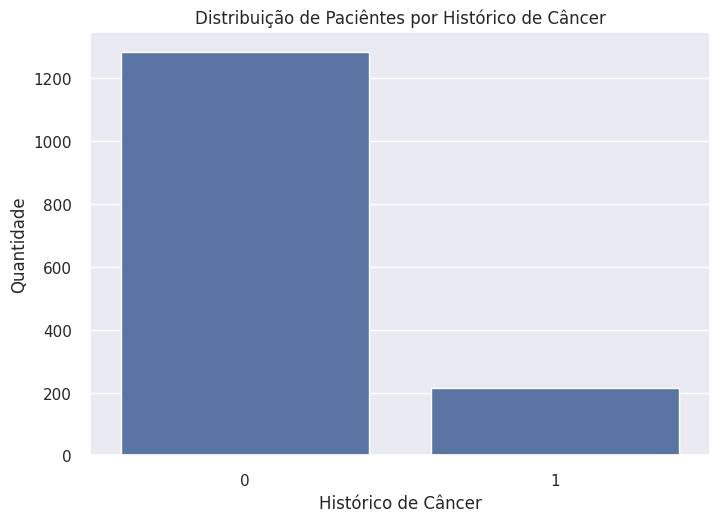

In [11]:
# Gráfico 5: Distribuição dos dados por Histórico de Câncer

## 0 -> No
## 1 -> Yes

sns.countplot(x = 'CancerHistory', data = dados)

plt.title('Distribuição de Paciêntes por Histórico de Câncer')
plt.xlabel('Histórico de Câncer')
plt.ylabel('Quantidade')

plt.show();

**Observação 5**

<p align="justify">
O gráfico de barras da variável CancerHistory mostra a distribuição dos pacientes por histórico de câncer, com a categoria 0 (sem histórico) contendo cerca de 1200 pacientes e a categoria 1 (com histórico) contendo aproximadamente 300 pacientes, indicando uma predominância significativa de pacientes sem histórico de câncer, com quatro vezes mais pacientes sem histórico do que com histórico no dataset.

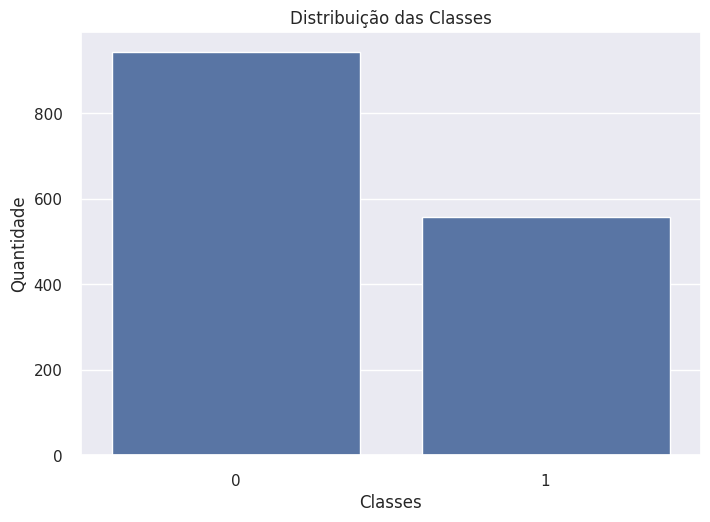

In [12]:
# Gráfico 6: Distribuição das Classes

## 0 -> No Cancer
## 1 -> Cancer

sns.countplot(x = 'Diagnosis', data = dados)

plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Quantidade')

plt.show();

**Observação 6**

<p align="justify">
O gráfico de barras da variável Diagnosis mostra a distribuição das classes, com a categoria 0 (sem câncer) contendo cerca de 900 pacientes e a categoria 1 (com câncer) contendo aproximadamente 500 pacientes, indicando um leve desbalanceamento entre as classes, com quase duas vezes mais pacientes sem câncer do que com câncer no dataset.

## **3. Pré-Processamento de Dados**

In [13]:
# Separando os dados em previsores e classe

previsores = dados.drop('Diagnosis', axis = 1)
classe = dados['Diagnosis']

In [14]:
# Escalonando os dados

## Instânciando objeto
scaler = StandardScaler()

## Aplicando aos dados
previsores = scaler.fit_transform(previsores)

In [15]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classe,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [16]:
# Verificando distribuição dos dados

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(1050, 8)
(450, 8)
(1050,)
(450,)


## **4. Construindo Modelo**

In [17]:
# Verificando melhor técnica a se usar com o PyCaret

clf = setup(data = dados,
            target = 'Diagnosis',
            session_id = 0)
compare_models()

,Description,Value
0,Session id,0
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(1500, 9)"
4,Transformed data shape,"(1500, 9)"
5,Transformed train set shape,"(1050, 9)"
6,Transformed test set shape,"(450, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9210,0.9540,0.8744,0.9107,0.8915,0.8294,0.8306,0.2130
ada,Ada Boost Classifier,0.9162,0.9470,0.8590,0.9129,0.8840,0.8185,0.8206,0.1320
rf,Random Forest Classifier,0.9095,0.9430,0.8436,0.9091,0.8732,0.8032,0.8064,0.2400
lightgbm,Light Gradient Boosting Machine,0.9067,0.9408,0.8513,0.8969,0.8718,0.7986,0.8011,0.5450
xgboost,Extreme Gradient Boosting,0.8962,0.9444,0.8385,0.8823,0.8568,0.7757,0.7794,0.1640
et,Extra Trees Classifier,0.8752,0.9281,0.7846,0.8694,0.8232,0.7274,0.7312,0.2690
dt,Decision Tree Classifier,0.8486,0.8355,0.7846,0.8087,0.7925,0.6737,0.6777,0.0500
qda,Quadratic Discriminant Analysis,0.8448,0.9035,0.7179,0.8421,0.7733,0.6567,0.6630,0.0240
ridge,Ridge Classifier,0.8371,0.9110,0.7231,0.8243,0.7671,0.6430,0.6494,0.0250
lr,Logistic Regression,0.8362,0.9118,0.7385,0.8095,0.7695,0.6432,0.6476,0.7000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
# Carregando biblioteca

from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# Instânciando modelo e passando parâmetros encontrados com o PyCaret

modelo = GradientBoostingClassifier(ccp_alpha=0.0,
                                    criterion='friedman_mse',
                                    init=None,
                                    learning_rate=0.1,
                                    loss='log_loss',
                                    max_depth=3,
                                    max_features=None,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100,
                                    n_iter_no_change=None,
                                    random_state=0,
                                    subsample=1.0,
                                    tol=0.0001,
                                    validation_fraction=0.1,
                                    verbose=0,
                                    warm_start=False)

In [20]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
# Realizando previsões com os dados de texte

previsoes = modelo.predict(X_teste)

## **5. Avaliando Modelo**

In [22]:
# Avaliando Desempenho do Modelo com Classification Report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       281
           1       0.93      0.92      0.93       169

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



## **6. Considerações Finais**

<p align="justify">
A análise exploratória de dados (EDA) do Cancer Prediction Dataset revelou características importantes do conjunto de dados: o histograma da variável Age mostrou que a idade dos pacientes varia de 20 a 80 anos, com uma distribuição relativamente uniforme entre 25 e 75 anos e leves picos próximos aos 30, 50 e 70 anos, sem outliers extremos; a distribuição por gênero indicou uma proporção quase equilibrada, com cerca de 750 pacientes masculinos (0) e 700 femininos (1); a variável Smoking destacou uma predominância de não fumantes, com cerca de 1000 pacientes não fumantes (0) contra 400 fumantes (1); o risco genético (GeneticRisk) apresentou cerca de 900 pacientes com baixo risco (0), 400 com médio risco (1) e 200 com alto risco (2), indicando maior prevalência de baixo risco; e o histórico de câncer (CancerHistory) mostrou 1200 pacientes sem histórico (0) e 300 com histórico (1), evidenciando uma maioria sem histórico familiar.

<p align="justify">
A distribuição das classes (Diagnosis) revelou um leve desbalanceamento, com 900 pacientes sem câncer (0) e 500 com câncer (1), uma proporção de aproximadamente 1,8:1. Apesar disso, o modelo GradientBoostingClassifier obteve um desempenho robusto, alcançando acurácia de 94%, precisão de 95% e recall de 96% para a classe 0 (sem câncer), e precisão de 93% e recall de 92% para a classe 1 (com câncer), com F1-scores de 96% e 93%, respectivamente, demonstrando capacidade de lidar bem com ambas as classes, mesmo com o desbalanceamento.

<p align="justify">
Sobre o balanceamento, o desbalanceamento leve (1,8:1) não impactou significativamente o desempenho do modelo, já que o GradientBoostingClassifier conseguiu um recall de 0.92 para a classe 1, capturando 92% dos casos de câncer, o que é satisfatório para um contexto médico; portanto, não foi estritamente necessário aplicar técnicas de balanceamento, embora ajustes como SMOTE ou pesos de classe possam ser explorados para otimizar ainda mais o recall.

<p align="justify">
Este projeto destaca o potencial do machine learning na saúde, mostrando como o GradientBoostingClassifier pode apoiar o diagnóstico precoce de câncer com alta confiabilidade. Para o futuro, pretendo testar outros algoritmos, como redes neurais, e incorporar mais variáveis clínicas para aumentar a robustez das previsões, além de explorar técnicas de balanceamento para buscar melhorias incrementais no recall da classe positiva.